In [1]:
%matplotlib inline

import numpy as np
from numpy import linalg as nla
import scipy as sp
from scipy import linalg as sla
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from time import time
import SHFunctions as shf
import os

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

    A = shf.MakeStochA(4,6)

In [2]:
    A = shf.MakeSingularA(3, 2, delta = .00010)

    A = np.array([[[0, 1/3, 1/3],
                   [1/3, 0, 1/3],
                   [1/3, 1/3, 0]],
                  [[-2, 1/3, 1/3],
                   [1/3, -2, 1/3],
                   [1/3, 1/3, -2]],
                  [[0, 1/3, 1/3],
                   [1/3, 0, 1/3],
                   [1/3, 1/3, 0]]])

    A = np.array([[[1, 0, 0],
                   [0, 2, 0],
                   [0, 0, 2]],
                  [[-2, 0, 0],
                   [0, -3, 0],
                   [0, 0, -3]],
                  [[1, 0, 0],
                   [0, 1, 0],
                   [0, 0, 1]]])

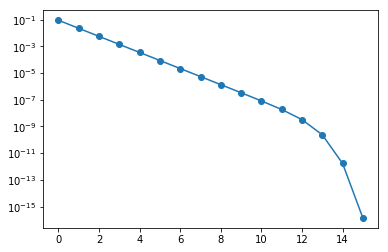

In [3]:
    Ss = shf.NewtonPoly(A)
    ax = plt.subplot(111)
    ax.semilogy(Ss['errs'],'-o')

In [4]:
    Ds = []
    EVs = []
    for i in range(len(Ss['P_Xs'])):
        d, ev = nla.eig(Ss['P_Xs'][i])
        Ds.append(d)
        EVs.append(ev)

In [5]:
    np.set_printoptions(linewidth = 200)
    for i in range(len(Ds)):
        print(Ds[i])
        print(EVs[i])

[-0.6667     -1.26518665 -1.06811335 -0.6667     -1.26518665 -1.06811335 -0.6667     -1.26518665 -1.06811335]
[[-0.57735027 -0.72238992  0.24380106  0.          0.          0.          0.          0.          0.        ]
 [-0.57735027  0.03807285 -0.95875989  0.          0.          0.          0.          0.          0.        ]
 [-0.57735027  0.69043701  0.14608393  0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.         -0.57735027 -0.72238992  0.24380106  0.          0.          0.        ]
 [ 0.          0.          0.         -0.57735027  0.03807285 -0.95875989  0.          0.          0.        ]
 [ 0.          0.          0.         -0.57735027  0.69043701  0.14608393  0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.         -0.57735027 -0.72238992  0.24380106]
 [ 0.          0.          0.          0.          0.          0.         -0.57735027  0.03807285 -0.95875989]
 [

In [6]:
    coeffi = np.zeros((Ss['Hs'][i].shape[0] * Ss['Hs'][i].shape[1],len(EVs)))
    for i in range(len(EVs)):
        h = nla.solve(EVs[i], np.reshape(Ss['Hs'][i], (Ss['Hs'][i].shape[0] * Ss['Hs'][i].shape[1],1), order='F'))
        coeffi[:,i] = np.squeeze(h)
    coeffi.transpose()

array([[ 3.55762251e-01, -1.42536043e-01,  2.56054106e-02,  1.45955006e-01, -1.26064991e-02, -5.54537113e-02,  3.64178249e-01,  1.55142542e-01,  2.98483008e-02],
       [ 2.64809089e-01, -2.02194222e-17,  1.26010147e-16, -2.61732890e-17, -1.73397390e-17, -1.01614108e-02,  1.09091490e-16, -6.72889008e-17,  2.78312495e-04],
       [ 1.32404521e-01,  5.03135591e-18,  5.65557086e-17,  7.43596183e-18,  1.79871461e-17,  2.36637996e-05, -6.82127459e-19,  6.55346035e-17,  4.66459060e-09],
       [ 6.62022128e-02,  2.10150956e-17,  1.23296092e-16,  6.66804150e-17, -7.68457399e-18,  1.28336498e-10, -2.40064985e-17, -6.58701076e-17,  2.48811777e-17],
       [ 3.31010111e-02, -6.93443924e-17, -1.44744388e-16, -1.26268018e-17, -4.06917056e-18,  1.04443316e-17,  7.45559937e-18,  8.39120808e-19,  7.78710897e-18],
       [ 1.65503149e-02,  3.16465497e-17,  7.32653052e-17,  1.79080941e-17,  1.88733539e-18,  1.70166456e-17, -2.88205160e-17,  1.94681792e-17, -1.92830869e-17],
       [ 8.27477618e-03,  6.

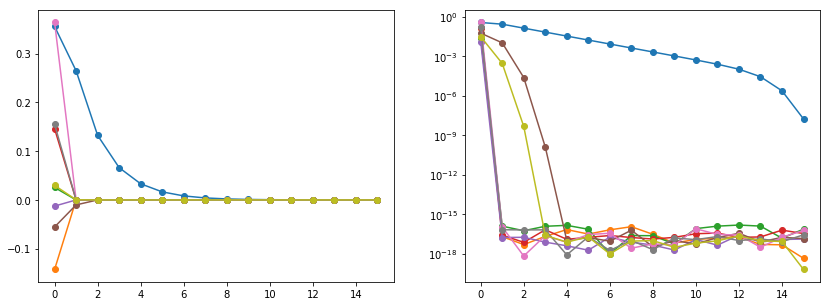

In [10]:
    fig = plt.figure(figsize=(14,5))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    for i in range(coeffi.shape[0]):
        ax1.plot(coeffi[i,:],'-o')
        ax2.semilogy(np.abs(coeffi[i,:]),'-o')
        